# Librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from keras.regularizers import l2


# Late Fusion

In [5]:
# Monta tu Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Cargo las predicciones de la MLP

MLP_predic_train = np.load('/content/drive/MyDrive/keepcoding_DL/MLP_predic_TrainClass.npy')
MLP_predic_val = np.load('/content/drive/MyDrive/keepcoding_DL/MLP_predic_ValClass.npy')
MLP_predic_test = np.load('/content/drive/MyDrive/keepcoding_DL/MLP_predic_TestClass.npy')

In [7]:
# Cargo las predicciones de la CNN

CNN_predic_train = np.load('/content/drive/MyDrive/keepcoding_DL/CNN1_predic_TrainClass.npy')
CNN_predic_val = np.load('/content/drive/MyDrive/keepcoding_DL/CNN1_predic_ValClass.npy')
CNN_predic_test = np.load('/content/drive/MyDrive/keepcoding_DL/CNN1_predic_TestClass.npy')

In [8]:
y_train_img = np.load('/content/drive/MyDrive/keepcoding_DL/y_train_img.npy')
y_val_img = np.load('/content/drive/MyDrive/keepcoding_DL/y_val_img.npy')
y_test_img = np.load('/content/drive/MyDrive/keepcoding_DL/y_test_img.npy')

In [9]:
late_fusion_features_train = np.concatenate((MLP_predic_train, CNN_predic_train), axis=1)
late_fusion_features_val = np.concatenate((MLP_predic_val, CNN_predic_val), axis=1)
late_fusion_features_test = np.concatenate((MLP_predic_test, CNN_predic_test), axis=1)

In [10]:
# Verifica los shapes
print("Training features size:", late_fusion_features_train.shape)
print("Training labels size:", y_train_img.shape)
print("Validation features size:", late_fusion_features_val.shape)
print("Validation labels size:", y_val_img.shape)
print("Test features size:", late_fusion_features_test.shape)
print("Test labels size:", y_test_img.shape)

Training features size: (1366, 6)
Training labels size: (1366, 3)
Validation features size: (342, 6)
Validation labels size: (342, 3)
Test features size: (427, 6)
Test labels size: (427, 3)


[INFO]: Entrenando red neuronal...
Epoch 1/300
11/11 [==============================] - 1s 26ms/step - loss: 1.9296 - accuracy: 0.3287 - val_loss: 1.9261 - val_accuracy: 0.3363
Epoch 2/300
11/11 [==============================] - 0s 16ms/step - loss: 1.9290 - accuracy: 0.3294 - val_loss: 1.9239 - val_accuracy: 0.3363
Epoch 3/300
11/11 [==============================] - 0s 14ms/step - loss: 1.9269 - accuracy: 0.3228 - val_loss: 1.9216 - val_accuracy: 0.3363
Epoch 4/300
11/11 [==============================] - 0s 11ms/step - loss: 1.9244 - accuracy: 0.3338 - val_loss: 1.9194 - val_accuracy: 0.3363
Epoch 5/300
11/11 [==============================] - 0s 10ms/step - loss: 1.9219 - accuracy: 0.3331 - val_loss: 1.9171 - val_accuracy: 0.3363
Epoch 6/300
11/11 [==============================] - 0s 16ms/step - loss: 1.9216 - accuracy: 0.3367 - val_loss: 1.9149 - val_accuracy: 0.3363
Epoch 7/300
11/11 [==============================] - 0s 12ms/step - loss: 1.9198 - accuracy: 0.3375 - val_loss: 1

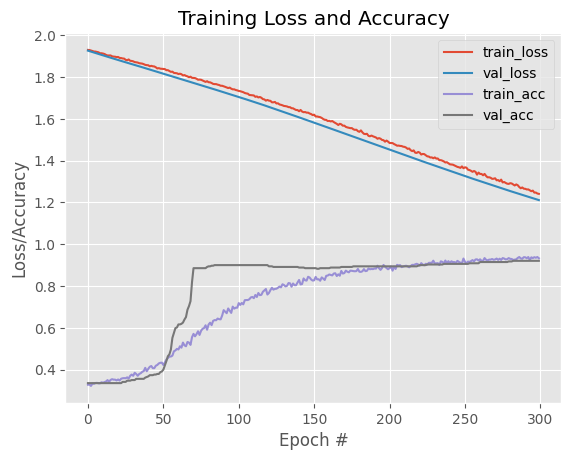

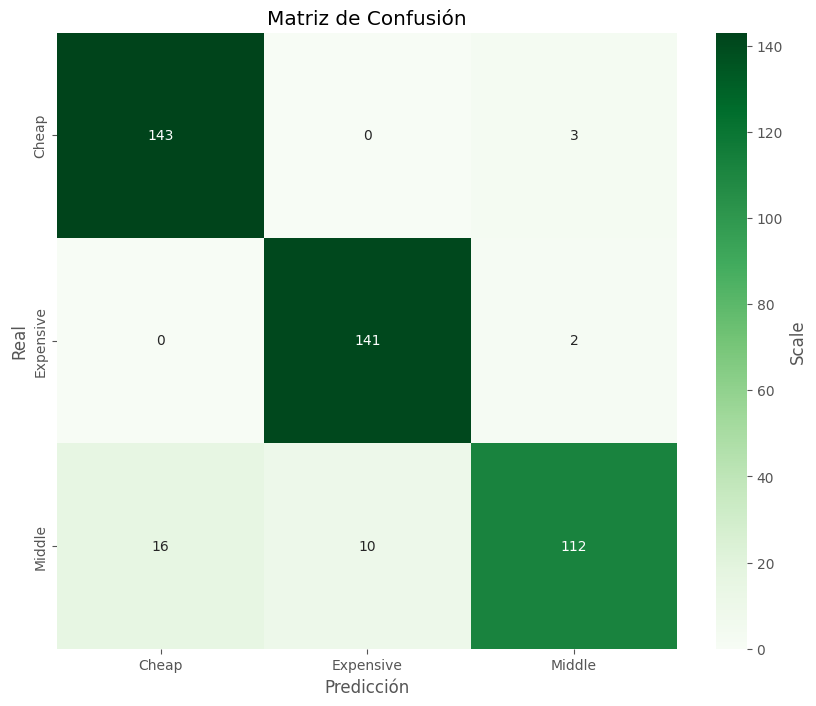

In [12]:
# Hiper-parámetros de nuestra red
lr = 0.001
n_epochs = 300
batch_size = 128

# Implementamos la red empleando Keras
model_late_fusion = Sequential()
model_late_fusion.add(Flatten())  # Estiramos los datos en forma de vector como entrada a nuestro Perceptrón Simple
model_late_fusion.add(Dense(128, activation="relu"))
model_late_fusion.add(Dropout(0.5))  # Capa de Dropout para regularización
model_late_fusion.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))  # Uso de regularización L2
model_late_fusion.add(Dense(32, activation="relu"))
model_late_fusion.add(Dense(3, activation="softmax"))

# Compilamos y entrenamos
print("[INFO]: Entrenando red neuronal...")
model_late_fusion.compile(loss="categorical_crossentropy", optimizer=SGD(lr), metrics=["accuracy"])

# Entrenar el modelo con Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
H = model_late_fusion.fit(late_fusion_features_train, y_train_img, validation_data=(late_fusion_features_val, y_val_img), epochs=n_epochs, batch_size=batch_size, callbacks=[early_stopping])


# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model_late_fusion.evaluate(late_fusion_features_test, y_test_img)
print(f'Test accuracy: {test_accuracy}')

# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

print('-----------------------------------------------')

# Visualizar y printear el modelo y el número de parámetros:
print('Modelo y número de parametros')
print(model_late_fusion.summary())

# Predecir y mostrar una clasificación

latepredicTrain = model_late_fusion.predict(late_fusion_features_train, batch_size=batch_size)
latepredicVal = model_late_fusion.predict(late_fusion_features_val , batch_size=batch_size)
latepredicTest = model_late_fusion.predict(late_fusion_features_test, batch_size=batch_size)
predicted_categories = np.argmax(latepredicTest, axis=1)
true_categories = np.argmax(y_test_img, axis=1)

np.save('/content/drive/MyDrive/keepcoding_DL/late_fusion_predic_TrainClass.npy', latepredicTrain)
np.save('/content/drive/MyDrive/keepcoding_DL/late_fusion_predic_ValClass.npy', latepredicVal)
np.save('/content/drive/MyDrive/keepcoding_DL/late_fusion_predic_TestClass.npy', latepredicTest)



# Nombres de las categorías
categories = ['Cheap', 'Expensive', 'Middle']

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(true_categories, predicted_categories)
class_report = classification_report(true_categories, predicted_categories, target_names=categories)
print(conf_matrix)
print(class_report)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(true_categories, predicted_categories)

# Visualiza la matriz de confusión con Seaborn
plt.figure(figsize=(10, 8))  # Ajusta el tamaño según necesites
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar_kws={'label': 'Scale'},
            xticklabels=categories, yticklabels=categories)
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Conclusiones

- El modelo obtiene buenos resultados para las clases 'Cheap' y 'Expensive'. El recall de estas dos clases nos indica que el modelo generaliza muy bien para estas categorías.
- Parece que la clase 'Middle' no obtiene buenos resultados. Su valor de precisión puede ser engañoso y es el valor de recall el que nos indica que el modelo no identifica correctamente esta categoría.
- En cuanto al accuracy, observamos una tasa muy alta en los datos de entrenamiento, lo que demuestra que el modelo es capaz de aprender efectivamente los patrones de los datos de entrenamiento.
- A pesar de ello, observamos que tanto en los datos de validación como en los de prueba se obtiene un accuracy un poco inferior, lo que es indicativo de sobreajuste en nuestro modelo.
- La función de pérdida disminuye gradualmente a lo largo del entrenamiento, pero esto no se traduce en una mejora significativa de la generalización del modelo, por lo que no se refleja una mejora en el accuracy de validación y prueba.
- Para solucionarlo, sería interesante incrementar la regularización e implementar técnicas de data augmentation, por ejemplo.